In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Cars Data.csv')

In [3]:
df['MSRP'] = df['MSRP'].replace(r'[\$,]', '', regex=True)
df['Invoice'] = df['Invoice'].replace(r'[\$,]', '', regex=True)

In [4]:
df.iloc[:,5:].astype('float')

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Unnamed: 15,Unnamed: 16
0,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0,NaN,NaN
1,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0,NaN,NaN
2,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0,NaN,NaN
3,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0,NaN,NaN
4,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
423,40565.0,38203.0,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0,NaN,NaN
424,42565.0,40083.0,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0,NaN,NaN
425,45210.0,42573.0,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0,NaN,NaN
426,26135.0,24641.0,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0,NaN,NaN


In [5]:
df['MSRP'] = df['MSRP'].astype('float')
df['Invoice'] = df['Invoice'].astype('float')

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
enc = LabelEncoder()
for i in range(5):
    df.iloc[:,i] = enc.fit_transform(df.iloc[:,i])

In [8]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Unnamed: 15,Unnamed: 16
0,0,229,1,0,0,36945.0,33337.0,3.5,6.0,265,17,23,4451,106,189,NaN,NaN
1,0,293,2,0,1,23820.0,21761.0,2.0,4.0,200,24,31,2778,101,172,NaN,NaN
2,0,366,2,0,1,26990.0,24647.0,2.4,4.0,200,22,29,3230,105,183,NaN,NaN
3,0,365,2,0,1,33195.0,30299.0,3.2,6.0,270,20,28,3575,108,186,NaN,NaN
4,0,0,2,0,1,43755.0,39014.0,3.5,6.0,225,18,24,3880,115,197,NaN,NaN


In [9]:
df = df.sample(frac=1)

In [10]:
df.rename(columns={'Model':'model','Type':'type','Origin':'origin','DriveTrain':'drivetrain','MSRP':'msrp','Invoice':'invoice',
                   'EngineSize':'enginesize','Cylinders':'cylinders','Horsepower':'horsepower','MPG_City':'mil_city',
                   'MPG_Highway':'mil_highway','Weight':'weight','Wheelbase':'wheelbase','Length':'length',
                   'Unnamed: 15':'un_15','Unnamed: 16':'un_16'},inplace=True)

In [11]:
df.drop(['un_15','un_16'],inplace=True,axis=1)

In [12]:
df.head()

,Make,model,type,origin,drivetrain,msrp,invoice,enginesize,cylinders,horsepower,mil_city,mil_highway,weight,wheelbase,length
157,10,50,2,0,1,19860.0,17924.0,2.4,4.0,160,26,34,2994,105,188
121,8,149,1,2,0,22515.0,20907.0,3.0,6.0,201,18,23,3346,103,173
375,35,15,1,0,1,27710.0,24801.0,4.0,6.0,245,18,21,4035,110,189
79,5,249,2,2,1,24225.0,22222.0,3.8,6.0,200,18,28,3434,111,198
170,12,47,2,0,1,11939.0,11209.0,1.6,4.0,103,29,33,2339,96,167


In [13]:
df.rename(columns={"Make":'make'},inplace=True)

In [14]:
df.tail()

,make,model,type,origin,drivetrain,msrp,invoice,enginesize,cylinders,horsepower,mil_city,mil_highway,weight,wheelbase,length
386,35,91,2,0,1,22775.0,20325.0,3.0,6.0,210,21,29,3296,107,189
335,29,74,3,1,2,43365.0,37886.0,2.7,6.0,228,20,29,2811,95,170
269,23,324,3,1,2,90520.0,84325.0,5.0,8.0,302,16,23,4065,101,179
308,26,242,2,0,1,29440.0,26966.0,3.5,6.0,265,20,28,3476,111,194
193,15,310,2,1,2,63120.0,57499.0,4.2,8.0,390,17,24,4046,115,192


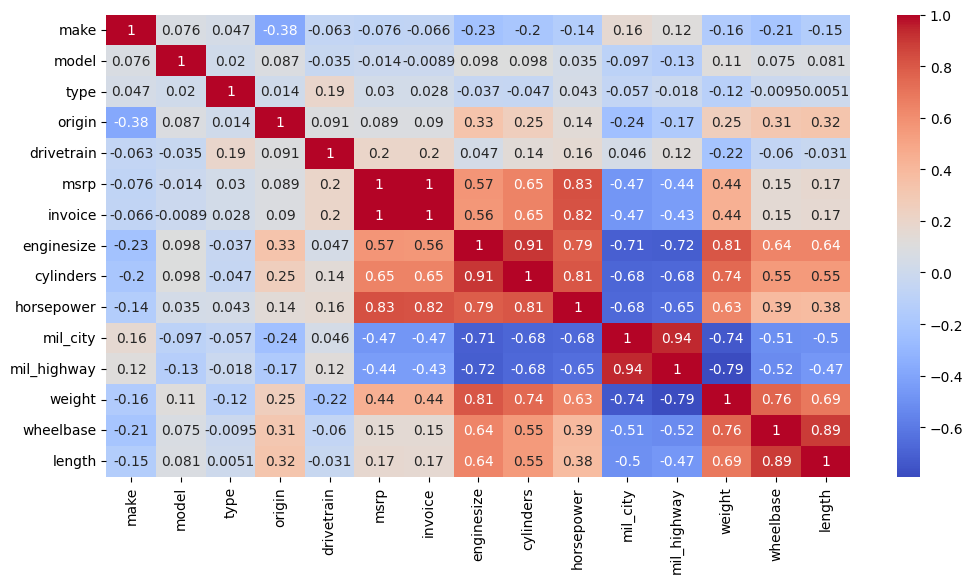

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [16]:
df.drop(['make','model','type'],inplace=True,axis=1)

In [17]:
df.head()

,origin,drivetrain,msrp,invoice,enginesize,cylinders,horsepower,mil_city,mil_highway,weight,wheelbase,length
157,0,1,19860.0,17924.0,2.4,4.0,160,26,34,2994,105,188
121,2,0,22515.0,20907.0,3.0,6.0,201,18,23,3346,103,173
375,0,1,27710.0,24801.0,4.0,6.0,245,18,21,4035,110,189
79,2,1,24225.0,22222.0,3.8,6.0,200,18,28,3434,111,198
170,0,1,11939.0,11209.0,1.6,4.0,103,29,33,2339,96,167


In [18]:
df.dropna(inplace=True)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test = train_test_split(df.drop('invoice',axis=1),df[['invoice']],test_size=0.3,random_state=1)
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
x_train.head()

,origin,drivetrain,msrp,enginesize,cylinders,horsepower,mil_city,mil_highway,weight,wheelbase,length
62,2,0,52975.0,6.0,8.0,345,13,17,5879,130,221
200,1,2,86995.0,4.2,8.0,390,16,23,4042,102,187
274,1,2,33780.0,2.6,6.0,168,19,25,3470,107,179
183,0,2,42845.0,4.5,8.0,340,17,23,3851,110,197
390,0,1,25920.0,3.0,6.0,210,21,29,3362,107,189


In [21]:
x_test.head()

,origin,drivetrain,msrp,enginesize,cylinders,horsepower,mil_city,mil_highway,weight,wheelbase,length
357,0,0,27145.0,2.5,4.0,165,20,27,3495,104,184
169,0,1,11839.0,1.6,4.0,103,29,33,2290,96,167
318,2,1,28790.0,3.4,6.0,185,19,26,3948,120,201
125,2,1,15580.0,2.0,4.0,130,26,33,2691,103,168
222,0,2,31045.0,3.0,6.0,215,18,25,3255,105,177


In [22]:
y_test.head()

,invoice
357,24687.0
169,11116.0
318,26120.0
125,14607.0
222,27404.0


In [23]:
y_train.head()

,invoice
62,48541.0
200,79226.0
274,31466.0
183,38792.0
390,23125.0


In [27]:
model.score(x_test, y_test)*100

99.24448167795937

In [28]:
model.score(x_train,y_train)*100

99.8270341152947

In [29]:
import pickle 
with open("Recondition.pickle",'wb') as f:
    pickle.dump(model,f)